# DRILLING PROBLEM

### Instance: A set of points $p_{1}, \dots ,p_{n} \in \mathbb{R}^{2}$
### Task: Find a permutation $\pi : \{1, \dots, n \} \rightarrow \{1, \dots, n \}$ such that $\Sigma^{n-1}_{i=1} d(p_{\pi(i)}, p_{\pi(i + 1)})$ is minimum. 


In [ ]:
!pip install peqnp
!pip install numpy
!pip install matplotlib

30 [4 1 3 2 6 9 0 5 7 8]


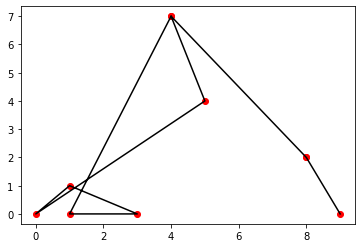

29 [8 2 9 7 5 0 6 4 3 1]


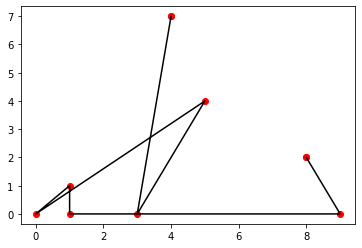

26 [9 0 5 6 1 7 2 8 3 4]


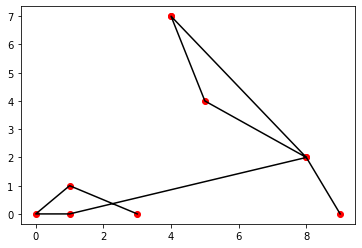

25 [7 2 8 3 1 4 6 5 9 0]


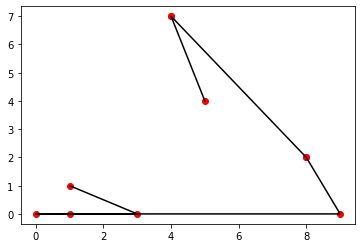

24 [8 2 3 4 1 7 6 5 0 9]


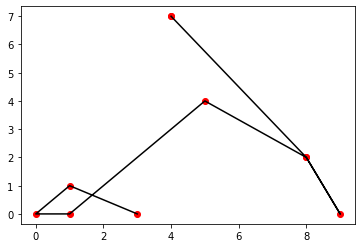

22 [5 6 0 9 7 8 2 4 1 3]


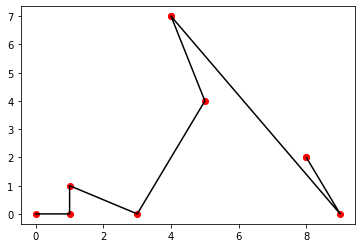

21 [4 3 1 7 8 2 5 0 6 9]


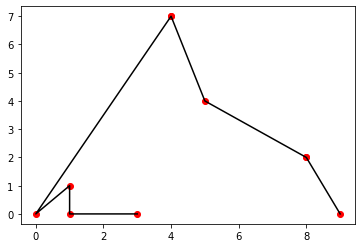

20 [4 3 1 2 8 7 9 5 0 6]


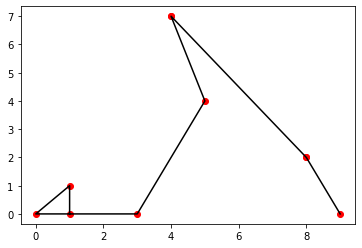

19 [5 0 6 9 4 1 3 7 2 8]


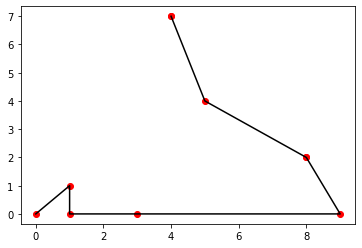

CPU times: user 1min 1s, sys: 270 ms, total: 1min 1s
Wall time: 1min 1s


In [4]:
%%time
import numpy as np
import peqnp as pn
import matplotlib.pyplot as plt

n = 10
ds = np.random.randint(0, 10, size=(n, 2))

mx = np.zeros(shape=(n, n))
for i in range(n):
    for j in range(n):
        mx[i][j] = np.round(np.linalg.norm(ds[i] - ds[j]))

opt = mx.sum()
while True:
    pn.engine(int(mx.sum()).bit_length())

    xs, ys = pn.matrix_permutation(mx.flatten(), n)

    assert sum(ys[:-1]) < opt

    if pn.satisfy(turbo=True):
        opt = sum(ys[:-1])
        xs = np.vectorize(int)(xs)
        print(opt, xs)
        a, b = zip(*ds[xs])
        plt.plot(a, b, 'ro')
        plt.plot(a, b, 'k-')
        plt.show()
        plt.close()
    else:
        break

 # DRILLING PROBLEM APROXIMATION WITH HESS BLACK-BOX ALGORITHM (O. Riveros)

19.0 [6, 5, 0, 9, 4, 3, 1, 7, 2, 8]


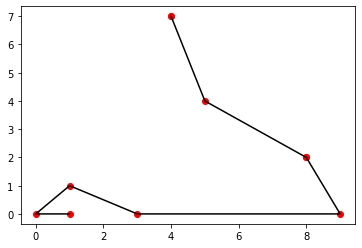

CPU times: user 288 ms, sys: 7.03 ms, total: 295 ms
Wall time: 293 ms


In [5]:
%%time
def oracle(seq):
    return sum(np.round(np.linalg.norm(ds[seq[i + 1]] - ds[seq[i]])) for i in range(n - 1))

seq = pn.hess_sequence(n, oracle=oracle, fast=False)

print(oracle(seq), seq)
a, b = zip(*ds[seq])
plt.plot(a, b, 'ro')
plt.plot(a, b, 'k-')
plt.show()
plt.close()